Read graph data from GML file.

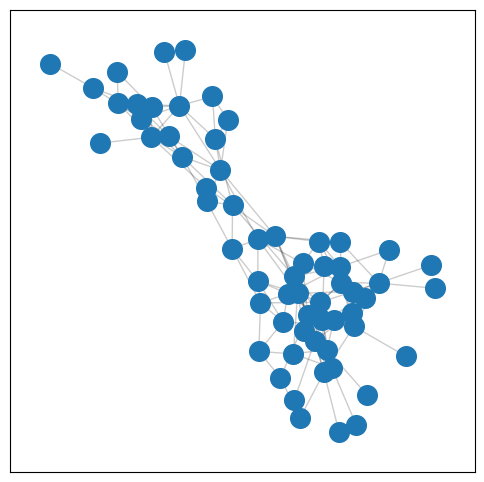

In [2]:
import networkx as nx
import os

def read_graph(gmlFile):
    try:
        network = nx.read_gml(gmlFile)
    except Exception as e:
        try:
            network = nx.read_gml(gmlFile, label='id')
        except Exception as e:
            print('Error reading graph from file', gmlFile)
            print(e)
            return None
    return network

crtDir = os.getcwd()
network = read_graph(os.path.join(crtDir, 'communityDetection', 'data', 'dolphins', 'dolphins.gml'))

import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt 
import warnings 

warnings.simplefilter('ignore')

def plotNetwork(network):

    pos = nx.spring_layout(network)  # compute graph layout
    plt.figure(figsize=(6, 6))  # image is 8 x 8 inches 
    nx.draw_networkx_nodes(network, pos, node_size=200, cmap=plt.cm.RdYlBu)
    nx.draw_networkx_edges(network, pos, alpha=0.2)
    plt.show(network)

plotNetwork(network)

Number of communities: 4


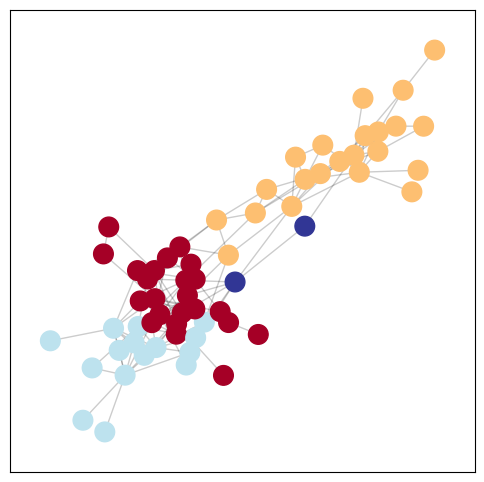

In [3]:
def getCommunity(network):
    return nx.community.greedy_modularity_communities(network)

def plotCommunity(network, communities):
    
    pos = nx.spring_layout(network)
    colors = {}
    color = 0
    for community in communities:
        for node in community:
            colors[node] = color
        color += 1
    pos = nx.spring_layout(network)
    plt.figure(figsize=(6, 6)) 
    nx.draw_networkx_nodes(network, pos, node_size=200, cmap=plt.cm.RdYlBu, node_color=[colors[node] for node in network.nodes])
    nx.draw_networkx_edges(network, pos, alpha=0.2)
    plt.show(network)

communities = getCommunity(network)

print("Number of communities:", len(communities))
plotCommunity(network, communities)

Football

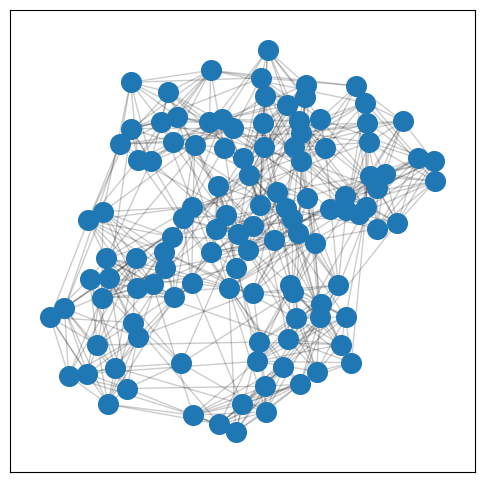

Number of communities: 7


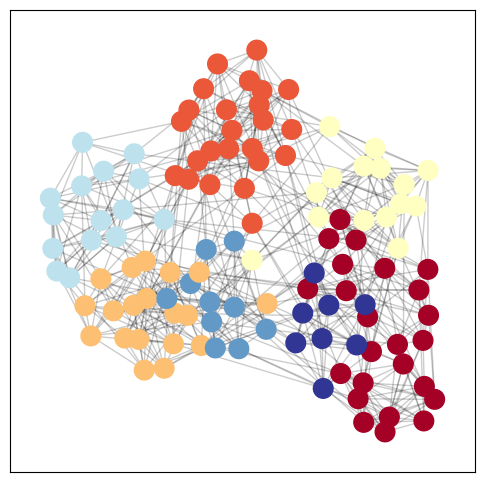

In [4]:
crtDir = os.getcwd()
network = read_graph(os.path.join(crtDir, 'communityDetection', 'data', 'football', 'football.gml'))
plotNetwork(network)

communities = getCommunity(network)

print("Number of communities:", len(communities))
plotCommunity(network, communities)

Karate

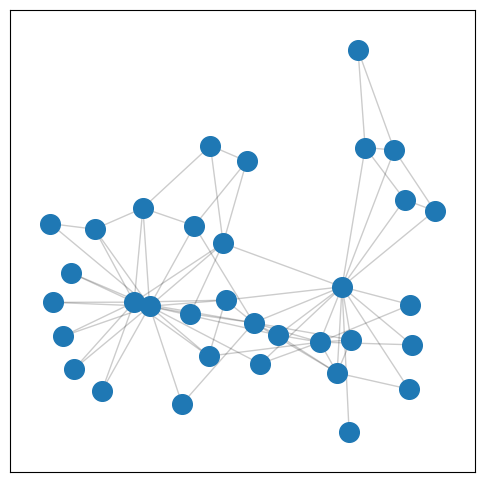

Modularity: 0.3806706114398422
Number of communities: 3


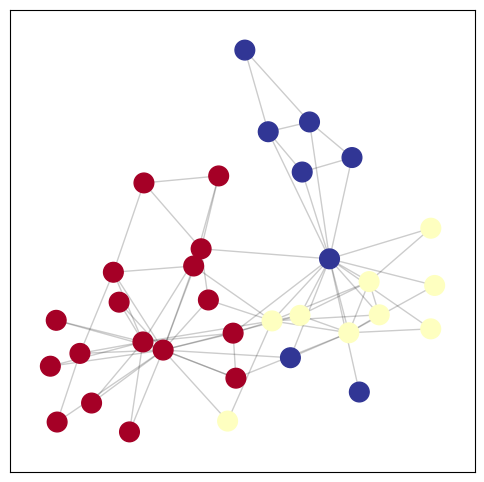

In [5]:
crtDir = os.getcwd()
network = read_graph(os.path.join(crtDir, 'communityDetection', 'data', 'karate', 'karate.gml'))
plotNetwork(network)

communities = getCommunity(network)

print("Modularity:", nx.community.modularity(network, communities))
print("Number of communities:", len(communities))
plotCommunity(network, communities)

Krebs


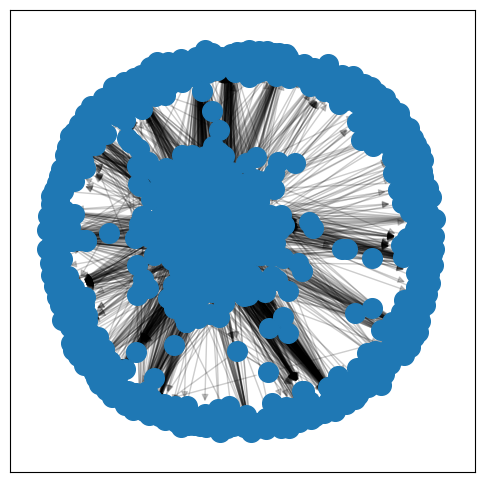

Number of communities: 280
Modularity: 0.4323833893089699


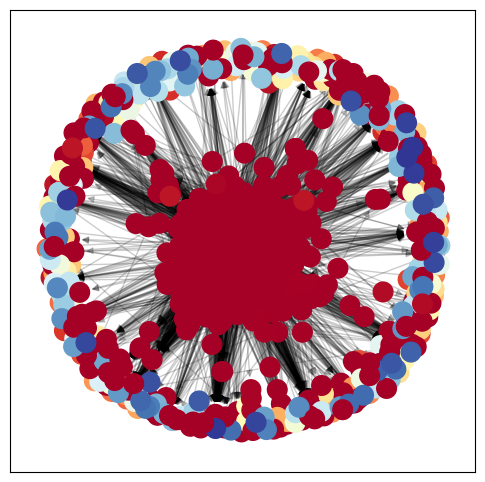

In [10]:
crtDir = os.getcwd()
network = read_graph(os.path.join(crtDir, 'communityDetection', 'data', 'custom', 'polblogs.gml'))
plotNetwork(network)

communities = getCommunity(network)

print("Number of communities:", len(communities))
print("Modularity:", nx.community.modularity(network, communities))
plotCommunity(network, communities)

Custom code

In [7]:
from random import randint
from MyRealChromosome import NetworkChromosome

class GA:
    def __init__(self, param = None , problParam = None):
        self.__param = param
        self.__problParam = problParam
        self.__population = []
    
    @property
    def population(self):
        return self.__population
    
    def initialisation(self):
        for _ in range(0, self.__param['popSize']):
            c = NetworkChromosome(self.__problParam)
            self.__population.append(c)
            
    def evaluation(self):
        for c in self.__population:
            c.fitness = self.__problParam['function'](c.repres, self.__param)
            
    def bestChromosome(self):
        best = self.__population[0]
        for c in self.__population:
            if c.fitness > best.fitness:
                best = c
        return best
    
    def worstChromosome(self):
        worst = self.__population[0]
        for c in self.__population:
            if (c.fitness > worst.fitness):
                worst = c
        return worst
    
    def selection(self):
        pos1 = randint(0, self.__param['popSize'] - 1)
        pos2 = randint(0, self.__param['popSize'] - 1)
        if (self.__population[pos1].fitness > self.__population[pos2].fitness):
            return pos1
        else:
            return pos2
        
    def oneGeneration(self):
        newPop = []
        for _ in range(self.__param['popSize']):
            p1 = self.__population[self.selection()]
            p2 = self.__population[self.selection()]
            off = p1.crossover(p2)
            for i in range(0, randint(1, self.__problParam['noDim'] - 1)):
                off.mutation()
            newPop.append(off)
        self.__population = newPop
        self.evaluation()
    
    def oneGenerationElitism(self):
        newPop = [self.bestChromosome()]
        for _ in range(self.__param['popSize'] - 1):
            p1 = self.__population[self.selection()]
            p2 = self.__population[self.selection()]
            off = p1.crossover(p2)
            off.mutation()
            newPop.append(off)
        self.__population = newPop
        self.evaluation()
        
    def oneGenerationSteadyState(self):
        for _ in range(self.__param['popSize']):
            p1 = self.__population[self.selection()]
            p2 = self.__population[self.selection()]
            off = p1.crossover(p2)
            off.mutation()
            off.fitness = self.__problParam['function'](off.repres, self.__param)
            worst = self.worstChromosome()
            if (off.fitness < worst.fitness):
                worst = off

def modularity(communities, param):
    noNodes = param['noNodes']
    mat = param['mat']
    degrees = param['degrees']
    noEdges = param['noEdges']  
    M = 2 * noEdges
    Q = 0.0
    for i in range(0, noNodes):
        for j in range(0, noNodes):
            if (communities[i] == communities[j]):
               Q += (mat[i][j] - degrees[i] * degrees[j] / M)
    return Q * 1 / M

def coverage(communities, param):
    mat = param['mat']
    communities = {}
    for node, comm in enumerate(communities):
        if comm not in communities:
            communities[comm] = set()
        communities[comm].add(node)
    
    intra_community_edges = 0
    total_edges = param['noEdges']
    for community in communities.values():
        for node in community:
            for neighbor in community:
                if mat[node][neighbor] == 1:
                    intra_community_edges += 1
    
    intra_community_edges /= 2  # each edge is counted twice
    return intra_community_edges / total_edges

def internal_density(partition, net):
    mat = net['mat']
    communities = {}
    for node, comm in enumerate(partition):
        if comm not in communities:
            communities[comm] = set()
        communities[comm].add(node)
    
    density_values = []
    for community in communities.values():
        internal_edges = 0
        possible_edges = len(community) * (len(community) - 1) / 2
        for node in community:
            for neighbor in community:
                if mat[node][neighbor] == 1:
                    internal_edges += 1
        
        internal_edges /= 2  # each edge is counted twice
        if possible_edges == 0:
            density_values.append(0)
        else:
            density_values.append(internal_edges / possible_edges)
    
    return sum(density_values) / len(density_values)

In [8]:
print(nx.to_numpy_array(network))

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


Best solution in generation 0 is: x = [0, 2, 5, 0, 13, 6, 2, 4, 1, 2, 5, 14, 15, 2, 0, 1, 0, 2, 1, 4, 3, 1, 2, 1, 0, 2, 7, 2, 3, 1, 5, 2, 8, 0, 0, 16, 3, 0, 0, 10, 0, 4, 5, 0, 3, 1, 11, 3, 17, 11, 0, 1, 0, 9, 4, 12, 6, 2, 18, 1, 8, 9] f(x) = 0.0
Best solution in generation 1 is: x = [0, 2, 5, 0, 13, 6, 2, 4, 1, 2, 5, 14, 15, 2, 0, 1, 0, 2, 1, 4, 3, 1, 2, 1, 0, 2, 7, 2, 3, 1, 5, 2, 8, 0, 0, 16, 3, 0, 0, 10, 0, 4, 5, 0, 3, 1, 11, 3, 17, 11, 0, 1, 0, 9, 4, 12, 6, 2, 18, 1, 8, 9] f(x) = 0.0
Best solution in generation 2 is: x = [0, 2, 5, 0, 13, 6, 2, 4, 1, 2, 5, 14, 15, 2, 0, 1, 0, 2, 1, 4, 3, 1, 2, 1, 0, 2, 7, 2, 3, 1, 5, 2, 8, 0, 0, 16, 3, 0, 0, 10, 0, 4, 5, 0, 3, 1, 11, 3, 17, 11, 0, 1, 0, 9, 4, 12, 6, 2, 18, 1, 8, 9] f(x) = 0.0
Best solution in generation 3 is: x = [0, 2, 5, 0, 13, 6, 2, 4, 1, 2, 5, 14, 15, 2, 0, 1, 0, 2, 1, 4, 3, 1, 2, 1, 0, 2, 7, 2, 3, 1, 5, 2, 8, 0, 0, 16, 3, 0, 0, 10, 0, 4, 5, 0, 3, 1, 11, 3, 17, 11, 0, 1, 0, 9, 4, 12, 6, 2, 18, 1, 8, 9] f(x) = 0.0
Best solution in

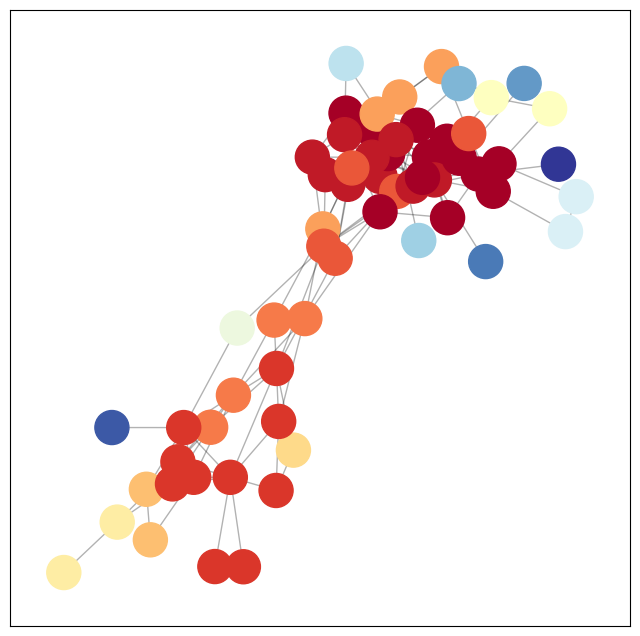

In [9]:
file_names = ['communityDetection/data/dolphins/dolphins.gml',
              'communityDetection/data/football/football.gml',
              'communityDetection/data/karate/karate.gml',
              'communityDetection/data/krebs/krebs.gml',
              'communityDetection/data/custom/Artificial_Intelligence__Machine_Learning.gml',
              'communityDetection/data/custom/citeseer.gml',
              'communityDetection/data/custom/cora.gml',
              'communityDetection/data/custom/Encryption_and_Compression.gml',
              'communityDetection/data/custom/polblogs.gml',
              'communityDetection/data/custom/sp_school_day_1.gml']

network = read_graph(file_names[0])


# initialise de GA parameters
gaParam = {'popSize' : len(network.nodes), 'noGen': 100, 'noNodes': len(network.nodes) ,'mat': nx.to_numpy_array(network), 'noEdges': len(network.edges), 'degrees': [val for (node, val) in network.degree]}
# problem parameters
problParam = {'function' : coverage, 'noDim' : len(network.nodes), 'network': network, 'mutRate': 0.1}

allBestFitnesses = []
allAvgFitnesses = []
generations = []

ga = GA(gaParam, problParam)
ga.initialisation()
ga.evaluation()

for g in range(gaParam['noGen']):
    #plotting preparation
    allPotentialSolutionsX = [c.repres for c in ga.population]
    allPotentialSolutionsY = [c.fitness for c in ga.population]
    bestSolX = ga.bestChromosome().repres
    bestSolY = ga.bestChromosome().fitness
    allBestFitnesses.append(bestSolY)
    allAvgFitnesses.append(sum(allPotentialSolutionsY) / len(allPotentialSolutionsY))
    # for sol in allPotentialSolutionsX:
    #     print(sol)
    generations.append(g)


    #logic alg
    # ga.oneGeneration()
    ga.oneGenerationElitism()
    # ga.oneGenerationSteadyState()
    
    bestChromo = ga.bestChromosome()
    print('Best solution in generation ' + str(g) + ' is: x = ' + str(bestChromo.repres) + ' f(x) = ' + str(bestChromo.fitness))

def plotMyCommunity(network, communities):
    pos = nx.spring_layout(network)  # compute graph layout
    plt.figure(figsize=(8, 8))  # image is 8 x 8 inches 
    nx.draw_networkx_nodes(network, pos, node_size = 600, cmap = plt.cm.RdYlBu, node_color = communities)
    nx.draw_networkx_edges(network, pos, alpha = 0.3)
    plt.show(network)
    
def makeCommunities(chromosome):
    communities = {}
    for i in range(len(chromosome)):
        communities.setdefault(chromosome[i], []).append(i)
    return communities
    

print("Number of communities:", len(ga.bestChromosome().repres))
print("Best finness:", ga.bestChromosome().fitness)
print(len(network.nodes))
print(makeCommunities(ga.bestChromosome().repres))
print(len(makeCommunities(ga.bestChromosome().repres)))
plotMyCommunity(network, ga.bestChromosome().repres)
    